In [4]:
from iertools import read
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
f = '../epw/MEX_GRO_Acapulco-Alvarez.Intl.AP.768056_TMYx.2009-2023.epw'
gro = read.read_epw(f,alias=True,year=2024)
gro.index.year.unique()
# Index([2015, 2014, 2021, 2022, 2016, 2011, 2020, 2018], dtype='int32', name='tiempo')



/Users/gbv/venvs/alldays/lib/python3.8/site-packages/iertools/read.py:218: UserWarning: Year has been changed, be carefull
  warnings.warn("Year has been changed, be carefull")


Index([2024], dtype='int32', name='tiempo')

<Axes: xlabel='tiempo'>

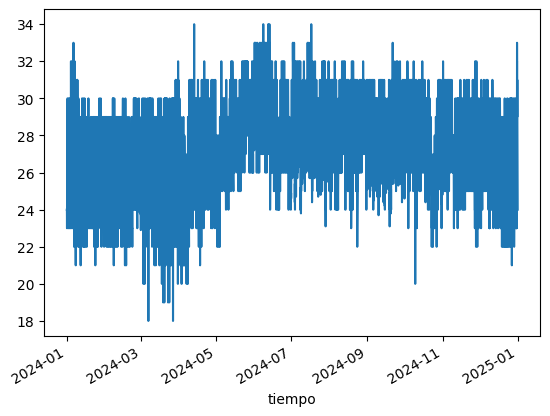

In [12]:
gro.To.plot()

In [3]:
def heatmap(columna,etiqueta='Temperatura [°C]',vmin=20,vmax=32):
    ## Diccionario de meses abreviados con mayúscula
    meses = {
        '01': 'Ene', '02': 'Feb', '03': 'Mar', '04': 'Abr',
        '05': 'May', '06': 'Jun', '07': 'Jul', '08': 'Ago',
        '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dic'
    }
    
    # Agrupación de datos
    mapa = gro[columna].groupby(by=[gro.index.strftime("%m"), gro.index.strftime("%H")]).mean().unstack().T
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Matriz con el gráfico
    cb = ax.matshow(mapa, aspect=0.2, cmap='jet', vmax=vmax, vmin=vmin)
    
    # Añadir colorbar con etiqueta
    cbar = fig.colorbar(cb, location='bottom', aspect=40, shrink=0.55,pad=0.05)
    cbar.set_label(etiqueta)
    
    # Configurar los xticks para los meses
    ax.set_xticks(range(len(mapa.columns)))
    ax.set_xticklabels([meses[mes] for mes in mapa.columns])
    
    # Configurar los yticks para las horas de 0 a 23 e invertir el eje y
    ax.set_yticks(range(len(mapa.index)))
    ax.set_yticklabels(range(24))
    ax.invert_yaxis()  # Invertir el eje y para que la hora 0 esté en la parte inferior
    
    plt.show()


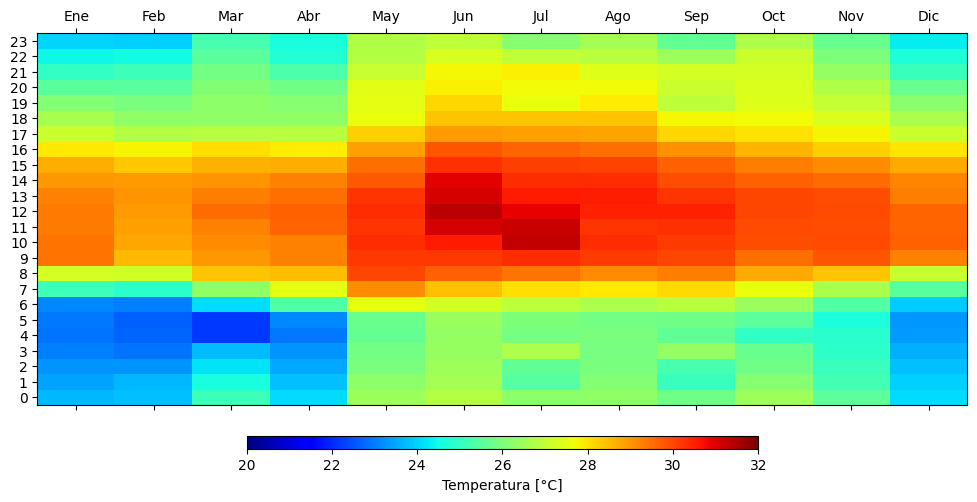

In [4]:
heatmap('To')

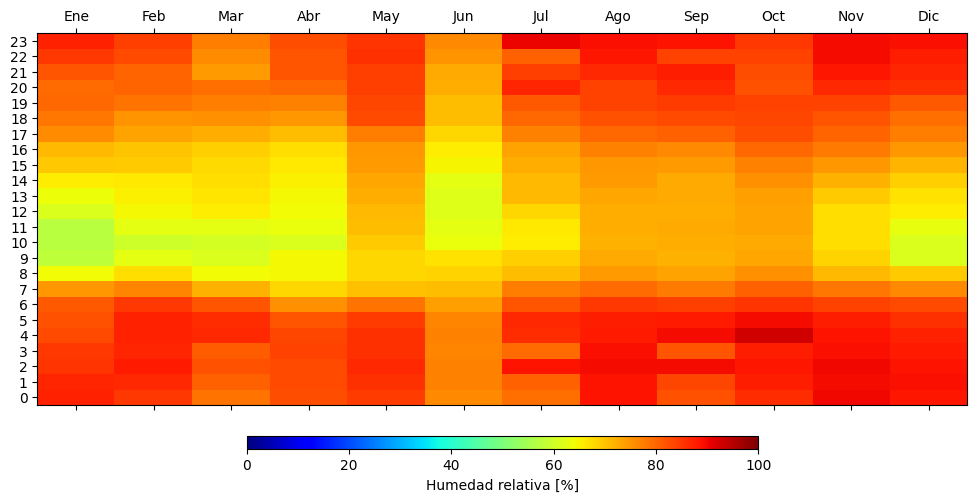

In [5]:
heatmap('RH',etiqueta='Humedad relativa [%]',vmin=0,vmax=100)

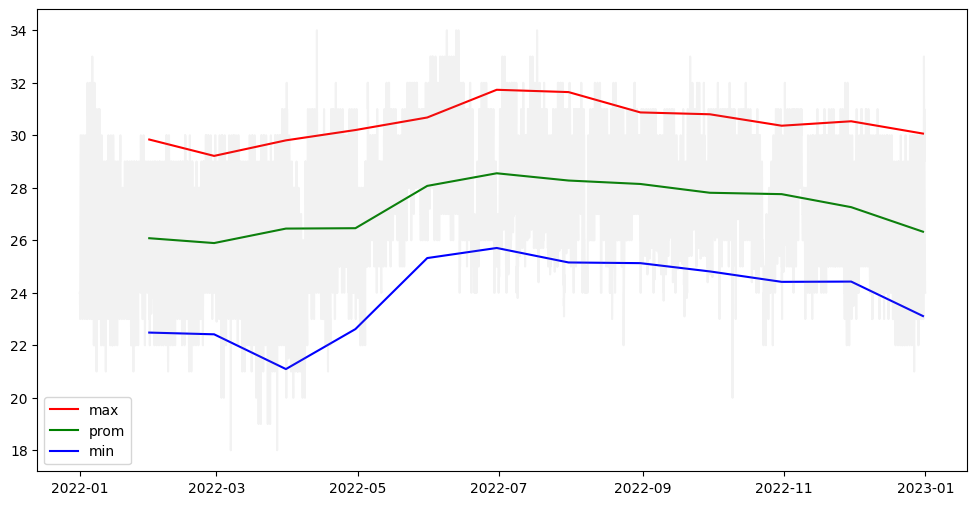

In [9]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(gro.To.resample('D').max().resample('ME').mean(),label='max',c='red')
ax.plot(gro.To.resample('ME').mean(),label='prom',c='green')
ax.plot(gro.To.resample('D').min().resample('ME').mean(),label='min',c='blue')
ax.plot(gro.To,c='gray',alpha=0.1)
ax.legend()